<a href="https://colab.research.google.com/github/Anurag1902/Disaster-Tweets-Classification-Using-BERT/blob/main/Comparitive_disaster_tweets_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=45e9b1c3c103b1a528ea3a09dccef581342e97f64871eafacb7fb87bea39074a
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from transformers import TFBertModel, TFGPT2Model, TFRobertaModel, TFXLNetModel, BertTokenizer, GPT2Tokenizer, RobertaTokenizer, XLNetTokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import emoji
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data = pd.read_csv('/content/NLP_Dataset_Formated.csv')

In [ ]:
data.head(50)

,Unnamed: 0,tweet_text,class_label,aggregated_label,message_len
0,0,donbradshawntv marshallampsuk came assistance ...,other_relevant_information,1,12
1,1,red cross distributes 30m fo mcmurray wildfire...,displaced_people_and_evacuations,0,10
2,2,interesting insight shifting communication lan...,other_relevant_information,1,11
3,3,globeandmail oil sand producer helping worker ...,rescue_volunteering_or_donation_effort,1,11
4,4,ottawa match red cross donation fo mcmurray wi...,rescue_volunteering_or_donation_effort,1,10
5,5,active fire ontario on411 onfires wildfire man...,caution_and_advice,0,8
6,6,syrian chocolatiers antigonish donate profit b...,rescue_volunteering_or_donation_effort,1,11
7,7,sometimes person want free food heshe get diff...,other_relevant_information,1,9
8,8,provincial bulletin expands highlight wildfire...,other_relevant_information,1,6
9,9,hunterolivia encourage make donation red cross...,rescue_volunteering_or_donation_effort,1,11


### EDA

In [ ]:
# Analyze tweet lengths
data['tweet_length'] = data['tweet_text'].apply(len)

# Summary statistics of tweet lengths
print("Summary Statistics of Tweet Lengths:")
print(data['tweet_length'].describe())
print("\n")


Summary Statistics of Tweet Lengths:
count    53531.000000
mean       103.856308
std         46.373229
min          4.000000
25%         72.000000
50%         92.000000
75%        129.000000
max        272.000000
Name: tweet_length, dtype: float64




Summary Statistics of Word Counts:
count    53531.000000
mean        14.275934
std          6.332577
min          1.000000
25%         10.000000
50%         13.000000
75%         18.000000
max         46.000000
Name: word_count, dtype: float64




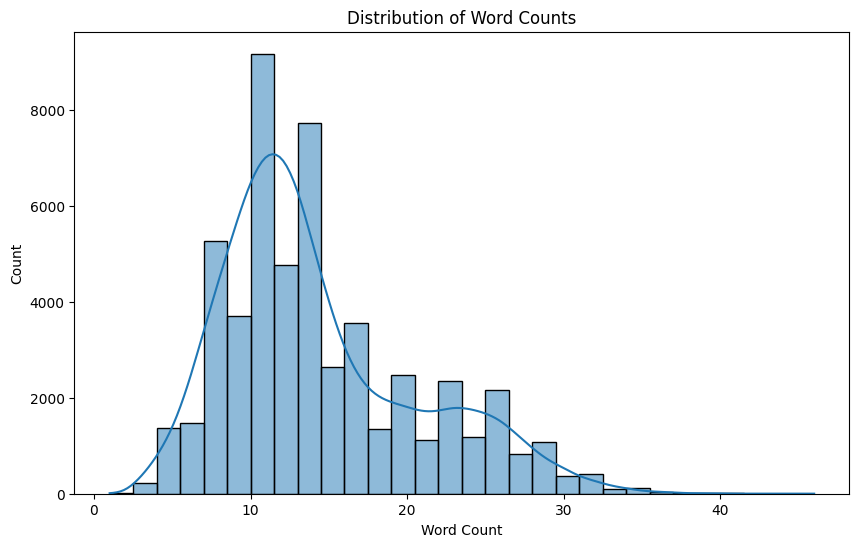

In [ ]:
# Explore word counts
data['word_count'] = data['tweet_text'].apply(lambda x: len(str(x).split()))

# Summary statistics of word counts
print("Summary Statistics of Word Counts:")
print(data['word_count'].describe())
print("\n")

# Visualize word counts
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()


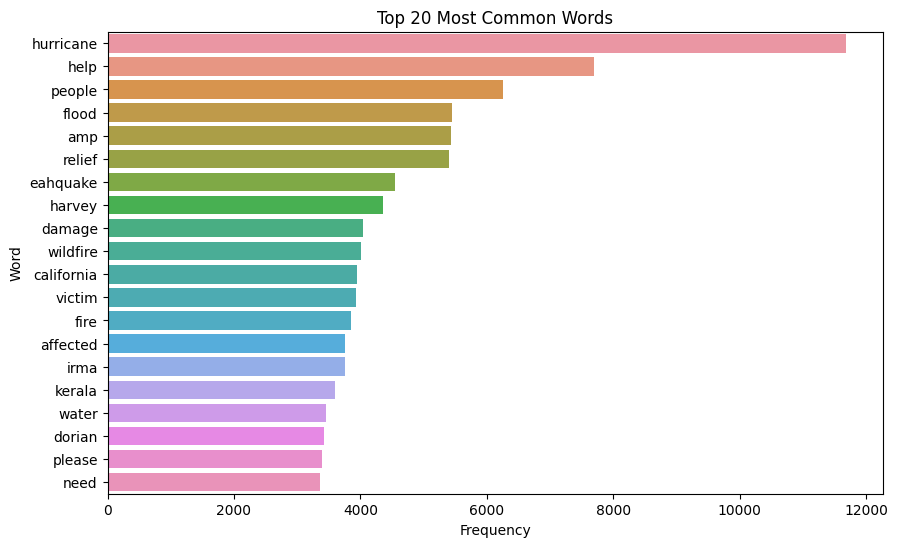

In [ ]:
# Word frequency analysis
from collections import Counter
from nltk.corpus import stopwords

# Function to plot word frequencies
def plot_word_frequencies(text_column, num_words=20):
    # Concatenate all tweets
    all_text = ' '.join(text_column.tolist())

    # Tokenize the text
    tokens = all_text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Count word frequencies
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(num_words)

    # Plot word frequencies
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words])
    plt.title('Top {} Most Common Words'.format(num_words))
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

# Plot word frequencies in tweets
plot_word_frequencies(data['tweet_text'])

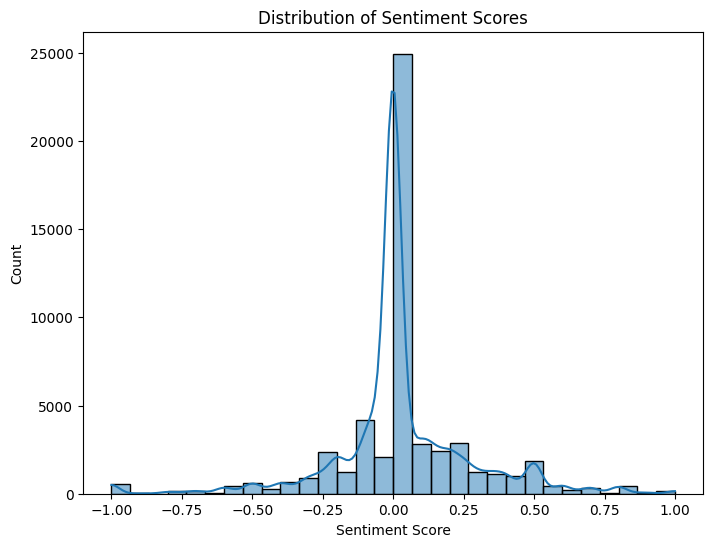

In [ ]:
# Sentiment analysis
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Apply sentiment analysis to tweets
data['sentiment'] = data['tweet_text'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

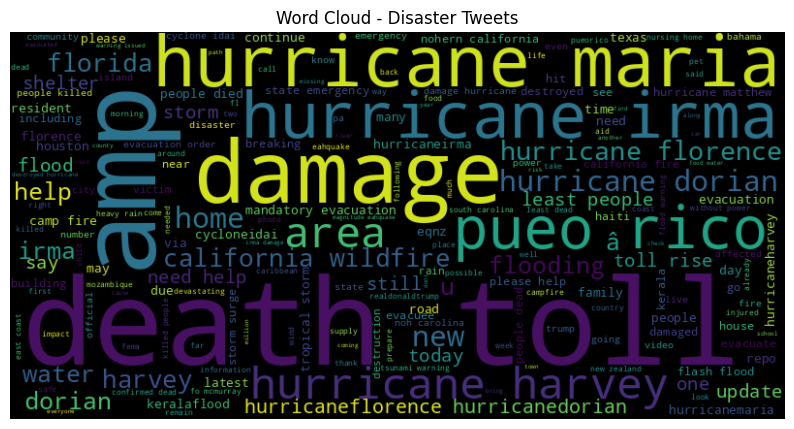

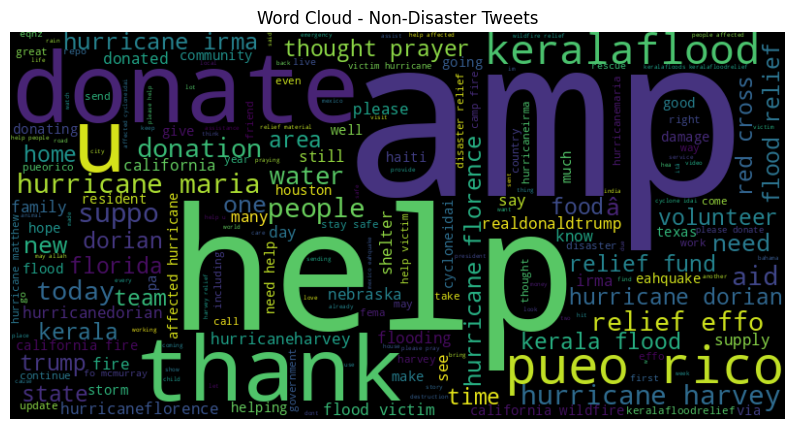

In [ ]:
from wordcloud import WordCloud

# Word cloud for disaster tweets
disaster_tweets = data[data['aggregated_label'] == 0]['tweet_text']
disaster_wordcloud = WordCloud(width=800, height=400).generate(' '.join(disaster_tweets))
plt.figure(figsize=(10, 6))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Disaster Tweets')
plt.axis('off')
plt.show()

# Word cloud for non-disaster tweets
non_disaster_tweets = data[data['aggregated_label'] == 1]['tweet_text']
non_disaster_wordcloud = WordCloud(width=800, height=400).generate(' '.join(non_disaster_tweets))
plt.figure(figsize=(10, 6))
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Non-Disaster Tweets')
plt.axis('off')
plt.show()


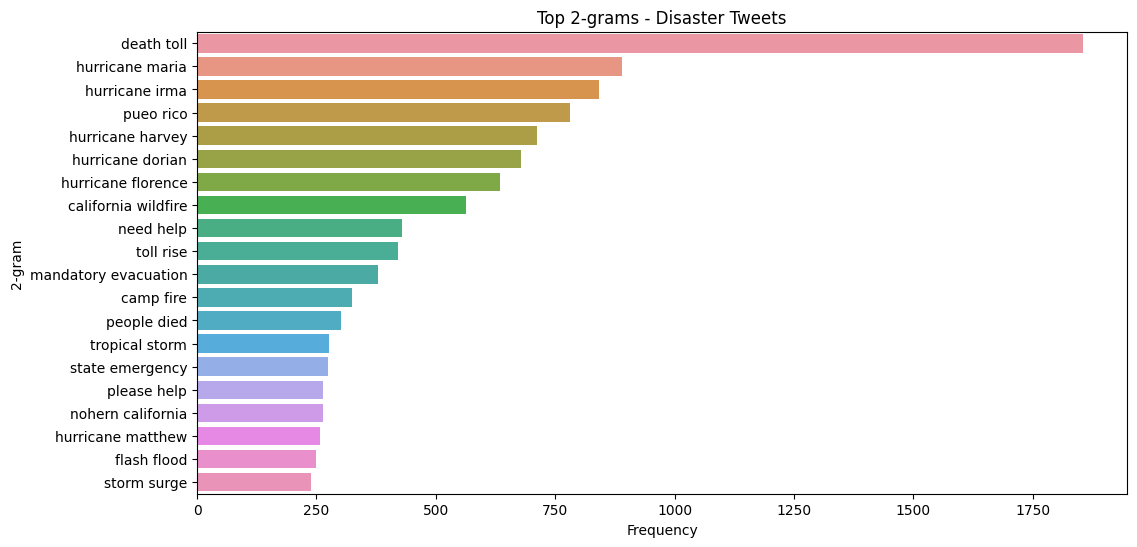

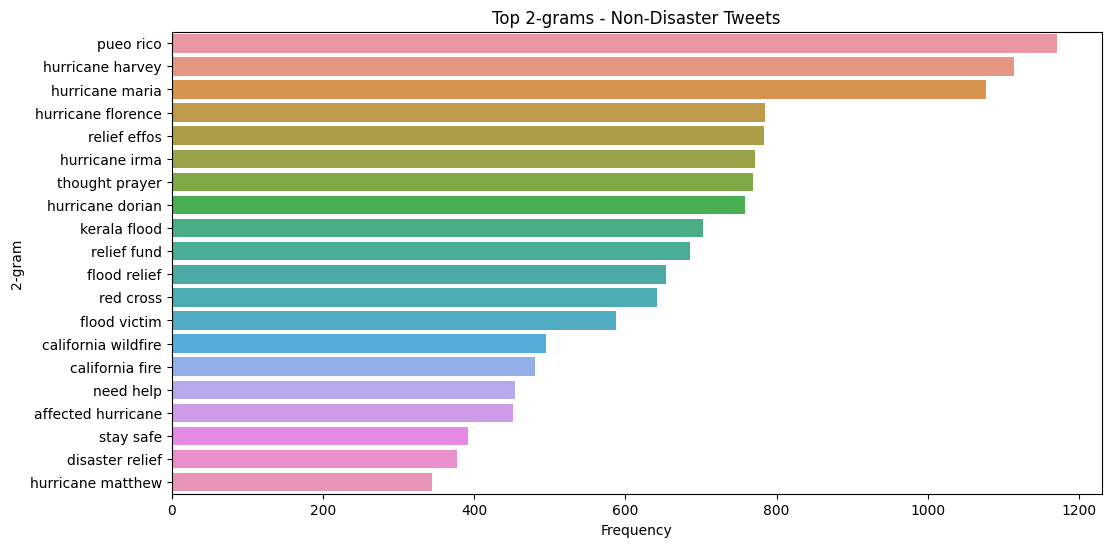

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate n-grams
def generate_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(text)
    ngram_freq = ngrams.sum(axis=0)
    ngram_freq_sorted = sorted([(word, ngram_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()],
                               key=lambda x: x[1], reverse=True)
    return ngram_freq_sorted

# Generate and plot n-grams for disaster tweets
n = 2  # Change n to desired n-gram length
disaster_ngrams = generate_ngrams(disaster_tweets, n)
disaster_ngrams_top = disaster_ngrams[:20]  # Select top 20 n-grams
disaster_ngrams_top_words = [ngram[0] for ngram in disaster_ngrams_top]
disaster_ngrams_top_freq = [ngram[1] for ngram in disaster_ngrams_top]
plt.figure(figsize=(12, 6))
sns.barplot(x=disaster_ngrams_top_freq, y=disaster_ngrams_top_words)
plt.title(f'Top {n}-grams - Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel(f'{n}-gram')
plt.show()

# Generate and plot n-grams for non-disaster tweets
non_disaster_ngrams = generate_ngrams(non_disaster_tweets, n)
non_disaster_ngrams_top = non_disaster_ngrams[:20]  # Select top 20 n-grams
non_disaster_ngrams_top_words = [ngram[0] for ngram in non_disaster_ngrams_top]
non_disaster_ngrams_top_freq = [ngram[1] for ngram in non_disaster_ngrams_top]
plt.figure(figsize=(12, 6))
sns.barplot(x=non_disaster_ngrams_top_freq, y=non_disaster_ngrams_top_words)
plt.title(f'Top {n}-grams - Non-Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel(f'{n}-gram')
plt.show()


In [ ]:
df = pd.read_csv('/content/NLP_dataset.csv')
df.head()

,tweet_id,tweet_text,class_label,canada wildfires_2016
0,7.360000e+17,RT @DonBradshawNTV: How @MarshallAmpsUK came t...,other_relevant_information,NaN
1,7.310000e+17,Red Cross distributes $30M to Fort McMurray wi...,displaced_people_and_evacuations,NaN
2,7.340000e+17,Interesting insights on the shifting communica...,other_relevant_information,NaN
3,7.320000e+17,RT @globeandmail: Oil sands producers helping ...,rescue_volunteering_or_donation_effort,NaN
4,7.290000e+17,Ottawa to match Red Cross donations for Fort M...,rescue_volunteering_or_donation_effort,NaN


In [ ]:
# Pre-processing
# Define the label aggregation mapping
label_mapping = {
    'displaced_people_and_evacuations': 'emergency_response',
    'injured_or_dead_people': 'emergency_response',
    'missing_or_found_people': 'emergency_response',
    'other_relevant_information': 'irrelevant',
    'rescue_volunteering_or_donation_effort': 'irrelevant',
    'caution_and_advice': 'emergency_response',
    'sympathy_and_support': 'irrelevant',
    'infrastructure_and_utility_damage': 'emergency_response',
    'not_humanitarian': 'irrelevant',
    'requests_or_urgent_needs': 'emergency_response'
}

# Apply label aggregation
df['aggregated_label'] = df['class_label'].map(label_mapping)
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['aggregated_label']= label_encoder.fit_transform(df['aggregated_label'])

df['aggregated_label'].unique()

array([1, 0])

In [ ]:
non_disaster_tweets = df[df['aggregated_label'] == 1]['tweet_text']
disaster_tweets = df[df['aggregated_label'] == 0]['tweet_text']

['on411', 'onfires', 'wildfire', 'manitoba411', 'mbfires', 'Canada', 'fortmacfire', 'ymmfire', 'ymmfire', 'ymm', 'Watershed', 'FortMacFire', 'loveit', 'AlbertaStrong', 'proud', 'FortMcMurray', 'wildfire', 'UrbanFringe', 'wildfire', 'FortMcMurray', 'FortMcMurray', 'Athabaskan', 'BCWildfire', 'ymmfire', 'AHSstaff', 'ymmfire', 'Wildfire', 'FortMac', 'Alberta', 'FortMacFire', 'cdnpoli', 'ymmfire', 'ymm', 'FortMac', 'sask', 'yxe', 'wildfire', 'ymmfire', 'FortMacMurray', 'evacuation', 'SMH', 'wildfire', 'Wildfire', 'Wildfire', 'NEWS', 'FortMcMurray', 'Saskatchewan', 'gpab', 'ymm', 'yyc', 'ymmfire', 'Fortmcmurray', 'FortMcMurray', 'FortMacFire', 'Kamloops', 'ymmfire', 'ymmfire', 'ymm', 'ymmfire', 'yeg', 'yxj', 'ymmfire', 'yeg', 'ymm', 'ymmfire', 'ymm', 'ymmfire', 'abfire', 'FortMcMurray', 'BC', 'Newsã', 'ymm', 'ymmfire', 'ymm', 'rmwb', 'FortMcMurray', 'ymmfire', 'wildfire', 'FoxCreek', 'ABEmergencyAdvisories', 'FortMac', 'wildfire', 'ymm', 'Abfire', 'FortMacFire', 'FortMacStrong', 'ymmfire', 

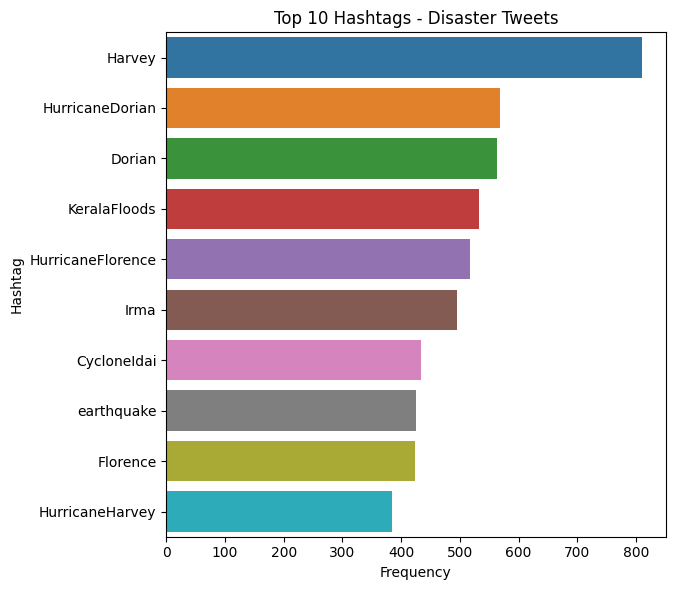

In [ ]:
import re

# Extract hashtags from disaster tweets
disaster_hashtags = [re.findall(r"#(\w+)", tweet) for tweet in disaster_tweets]
disaster_hashtags = sum(disaster_hashtags, [])  # Flatten the list
print(disaster_hashtags)
# Extract hashtags from non-disaster tweets
non_disaster_hashtags = [re.findall(r"#(\w+)", tweet) for tweet in non_disaster_tweets]
non_disaster_hashtags = sum(non_disaster_hashtags, [])  # Flatten the list

# Plot the top 10 hashtags for disaster and non-disaster tweets
disaster_hashtags_top = Counter(disaster_hashtags).most_common(10)
non_disaster_hashtags_top = Counter(non_disaster_hashtags).most_common(10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=[tag[1] for tag in disaster_hashtags_top], y=[tag[0] for tag in disaster_hashtags_top])
plt.title('Top 10 Hashtags - Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')

# plt.subplot(1, 2, 2)
# sns.barplot(x=[tag[1] for tag in non_disaster_hashtags_top], y=[tag[0] for tag in non_disaster_hashtags_top])
# plt.title('Top 10 Hashtags - Non-Disaster Tweets')
# plt.xlabel('Frequency')
# plt.ylabel('Hashtag')

plt.tight_layout()
plt.show()


In [ ]:
data.drop(columns=['tweet_id','canada wildfires_2016'], inplace=True)

In [ ]:
data

,tweet_text,class_label
0,RT @DonBradshawNTV: How @MarshallAmpsUK came t...,other_relevant_information
1,Red Cross distributes $30M to Fort McMurray wi...,displaced_people_and_evacuations
2,Interesting insights on the shifting communica...,other_relevant_information
3,RT @globeandmail: Oil sands producers helping ...,rescue_volunteering_or_donation_effort
4,Ottawa to match Red Cross donations for Fort M...,rescue_volunteering_or_donation_effort
...,...,...
53526,26 confirmed dead &amp; scores injured as 5.8 ...,injured_or_dead_people
53527,#Breaking Injured are being shifted to hospita...,injured_or_dead_people
53528,Always that one sher jawan who doesnâ€™t leave...,other_relevant_information
53529,Reports of deaths and dozens of injuries comin...,injured_or_dead_people


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Extract the labels from the dataset
labels = data['class_label']

# Vectorize the labels using TF-IDF
vectorizer = TfidfVectorizer()
label_vectors = vectorizer.fit_transform(labels)

# Perform k-means clustering on the label vectors
num_clusters = 2  # Adjust the number of clusters as desired
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(label_vectors)

# Assign cluster labels to each original label
cluster_labels = kmeans.labels_
# Create a mapping of original labels to aggregated labels based on cluster assignments
label_mapping = {}
for i, label in enumerate(labels):
    if label not in label_mapping:
        label_mapping[label] = cluster_labels[i]

# Apply label aggregation
data['aggregated_label'] = data['class_label'].map(label_mapping)


In [ ]:
for i in data['class_label'].unique():
    a = data[data['class_label']==i]
    print(i, a.aggregated_label.unique())

other_relevant_information [0]
displaced_people_and_evacuations [0]
rescue_volunteering_or_donation_effort [1]
caution_and_advice [0]
sympathy_and_support [0]
infrastructure_and_utility_damage [0]
not_humanitarian [0]
requests_or_urgent_needs [0]
injured_or_dead_people [0]
missing_or_found_people [0]


In [ ]:
# Pre-processing
# Define the label aggregation mapping
label_mapping = {
    'displaced_people_and_evacuations': 'emergency_response',
    'injured_or_dead_people': 'emergency_response',
    'missing_or_found_people': 'emergency_response',
    'other_relevant_information': 'irrelevant',
    'rescue_volunteering_or_donation_effort': 'irrelevant',
    'caution_and_advice': 'emergency_response',
    'sympathy_and_support': 'irrelevant',
    'infrastructure_and_utility_damage': 'emergency_response',
    'not_humanitarian': 'irrelevant',
    'requests_or_urgent_needs': 'emergency_response'
}

# Apply label aggregation
data['aggregated_label'] = data['class_label'].map(label_mapping)


In [ ]:
data.aggregated_label.unique()

array(['irrelevant', 'emergency_response'], dtype=object)

In [ ]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['aggregated_label']= label_encoder.fit_transform(data['aggregated_label'])

data['aggregated_label'].unique()

array([1, 0])

In [ ]:
data.drop(columns = ['class_label'], inplace = True)

In [ ]:
data

,tweet_text,aggregated_label
0,RT @DonBradshawNTV: How @MarshallAmpsUK came t...,1
1,Red Cross distributes $30M to Fort McMurray wi...,0
2,Interesting insights on the shifting communica...,1
3,RT @globeandmail: Oil sands producers helping ...,1
4,Ottawa to match Red Cross donations for Fort M...,1
...,...,...
53526,26 confirmed dead &amp; scores injured as 5.8 ...,0
53527,#Breaking Injured are being shifted to hospita...,0
53528,Always that one sher jawan who doesnâ€™t leave...,1
53529,Reports of deaths and dozens of injuries comin...,0


In [ ]:
def text_clear(data):
   # Lowercasing
    tx = data.apply(lambda x: x.lower())
    # Remove URLs
    tx = tx.apply(lambda x: re.sub("http\S+", '', str(x)))
    # Remove non-alphanumeric characters and extra spaces
    tx = tx.apply(lambda x: re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '',x))
    tx = tx.apply(lambda x: re.sub(' +', ' ', x))
    # Remove hashtags
    tx = tx.apply(lambda x: re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', x))
    # Remove usernames
    tx = tx.apply(lambda x: re.sub('(@[A-Za-z]+[A-za-z0-9-_]+)', '', x))
    # Remove "rt"
    tx = tx.apply(lambda x: re.sub('rt', '', x))
    # Remove punctuation
    tx = tx.apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tx = tx.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tx = tx.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    # Convert emojis to text
    tx = tx.apply(lambda x: emoji.demojize(x))
    return tx

data['tweet_text'] = text_clear(data['tweet_text'])

In [ ]:
data

,tweet_text,aggregated_label
0,donbradshawntv marshallampsuk came assistance ...,1
1,red cross distributes 30m fo mcmurray wildfire...,0
2,interesting insight shifting communication lan...,1
3,globeandmail oil sand producer helping worker ...,1
4,ottawa match red cross donation fo mcmurray wi...,1
...,...,...
53526,26 confirmed dead amp score injured 58 eahquak...,0
53527,breaking injured shifted hospital say minister...,0
53528,always one sher jawan doesnât leave building e...,1
53529,repos death dozen injury coming azad kashmir c...,0


In [ ]:
data['aggregated_label'].value_counts()

1    34049
0    19482
Name: aggregated_label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
# Define the number of classes
num_classes = 2

In [ ]:
len(train_data), len(test_data)

(42824, 10707)

## Tokenization

In [ ]:
# Load the pre-trained models and tokenizers
model_name_bert = 'bert-base-uncased'
tokenizer_bert = BertTokenizer.from_pretrained(model_name_bert)
model_bert = TFBertModel.from_pretrained(model_name_bert)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
def encode_bert(texts, max_length):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer_bert.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return np.array(input_ids), np.array(attention_masks)

In [ ]:
# def encode_gpt(texts, max_length):
#     input_ids = []

#     for text in texts:
#         encoded = tokenizer_gpt.encode(
#             text,
#             add_special_tokens=True,
#             max_length=max_length,
#             padding='max_length',
#             truncation=True,
#             return_tensors='tf'
#         )
#         input_ids.append(encoded['input_ids'].numpy())

#     return np.array(input_ids)


In [ ]:
# def encode_roberta(texts, max_length):
#     input_ids = []
#     attention_masks = []

#     for text in texts:
#         encoded = tokenizer_roberta.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=max_length,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True
#         )
#         input_ids.append(encoded['input_ids'])
#         attention_masks.append(encoded['attention_mask'])

#     return np.array(input_ids), np.array(attention_masks)

In [ ]:
# def encode_xlnet(texts, max_length):
#     input_ids = []
#     attention_masks = []

#     for text in texts:
#         encoded = tokenizer_xlnet.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=max_length,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True
#         )
#         input_ids.append(encoded['input_ids'])
#         attention_masks.append(encoded['attention_mask'])

#     return np.array(input_ids), np.array(attention_masks)

In [ ]:
train_data['message_len'] = train_data['tweet_text'].apply(lambda x: len(str(x).split(' ')))
train_data['message_len'].max()

46

In [ ]:
max_length = train_data['message_len'].max()
texts = train_data['tweet_text']
target = train_data['aggregated_label']

In [ ]:
train_data.drop(columns = ['message_len'], inplace = True)

In [ ]:
train_data

,tweet_text,aggregated_label
33482,weve teamed nfl help suppo california wildfire...,1
8358,repos least 2 dead harvey trigger catastrophic...,0
20436,keep donation coming near doubling goal harvey...,1
7563,houston need help donate visit text word harve...,1
29779,âbiblical disasterâ 50 killed wildfire greece ...,0
...,...,...
11284,sanantonio food bank accepting nonperishable i...,1
44732,beautiful share crowd gather see cherokee dam ...,1
38158,chemical america show charleston canceled gove...,0
860,bc woman drive truckfull donation fo mcmurray ...,1


In [ ]:
# # Tokenize the text data and obtain word embeddings
# train_encodings_bert = tokenizer_bert(list(train_data['tweet_text']), truncation=True,max_length=max_length, padding=True, return_tensors='tf')
# train_encodings_roberta = tokenizer_roberta(list(train_data['tweet_text']), truncation=True,max_length=max_length, padding=True, return_tensors='tf')
# train_encodings_xlnet = tokenizer_xlnet(list(train_data['tweet_text']), truncation=True,max_length=max_length, padding=True, return_tensors='tf')

# train_input_ids_bert = train_encodings_bert['input_ids']
# train_attention_masks_bert = train_encodings_bert['attention_mask']

# train_input_ids_roberta = train_encodings_roberta['input_ids']
# train_attention_masks_roberta = train_encodings_roberta['attention_mask']

# train_input_ids_xlnet = train_encodings_xlnet['input_ids']
# train_attention_masks_xlnet = train_encodings_xlnet['attention_mask']


In [ ]:
train_input_ids_bert, train_attention_masks_bert = encode_bert(texts, max_length)

In [ ]:
# train_input_ids_gpt = encode_gpt(texts, max_length)

In [ ]:
# train_input_ids_roberta, train_attention_masks_roberta = encode_roberta(texts, max_length)

In [ ]:
# train_input_ids_xlnet, train_attention_masks_xlnet = encode_xlnet(texts, max_length)

## Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Define the deep neural network architecture
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(max_length,)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='sigmoid'))
    return model

In [ ]:
# Define the maximum sequence length
max_length = 60


In [ ]:
# Initialize performance metrics
performance_metrics = {}


## BERT

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def create_model(bert_model):

    input_ids = tf.keras.Input(shape=(46,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(46,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(learning_rate=1e-5),  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model(model_bert)

In [ ]:
stoped = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
redutor = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
history = model.fit([train_input_ids_bert, train_attention_masks_bert],
    target, validation_split=0.2, epochs=10, batch_size=16, callbacks=[stoped, redutor])

Epoch 1/10
2142/2142 [==============================] - 512s 211ms/step - loss: 0.3301 - accuracy: 0.8566 - val_loss: 0.2783 - val_accuracy: 0.8803 - lr: 1.0000e-05
Epoch 2/10
2142/2142 [==============================] - 424s 198ms/step - loss: 0.2503 - accuracy: 0.8956 - val_loss: 0.2720 - val_accuracy: 0.8846 - lr: 1.0000e-05
Epoch 3/10
2142/2142 [==============================] - 420s 196ms/step - loss: 0.1925 - accuracy: 0.9211 - val_loss: 0.3111 - val_accuracy: 0.8846 - lr: 1.0000e-05
Epoch 4/10
2142/2142 [==============================] - 426s 199ms/step - loss: 0.1341 - accuracy: 0.9467 - val_loss: 0.3475 - val_accuracy: 0.8783 - lr: 1.0000e-05
Epoch 5/10
2142/2142 [==============================] - 426s 199ms/step - loss: 0.0865 - accuracy: 0.9670 - val_loss: 0.4210 - val_accuracy: 0.8767 - lr: 1.0000e-05
Epoch 6/10
2142/2142 [==============================] - 426s 199ms/step - loss: 0.0599 - accuracy: 0.9793 - val_loss: 0.4638 - val_accuracy: 0.8778 - lr: 1.0000e-05
Epoch 7/10

In [ ]:
history.history

{'loss': [0.3301263749599457,
  0.25034278631210327,
  0.19254934787750244,
  0.13413827121257782,
  0.08651099354028702,
  0.0598626472055912,
  0.040780581533908844],
 'accuracy': [0.8565924167633057,
  0.8956186771392822,
  0.9211302399635315,
  0.9467001557350159,
  0.9670159816741943,
  0.9793047308921814,
  0.9856096506118774],
 'val_loss': [0.2783495783805847,
  0.2719828486442566,
  0.3110519051551819,
  0.34752777218818665,
  0.42096713185310364,
  0.46375611424446106,
  0.5559484958648682],
 'val_accuracy': [0.8803269267082214,
  0.8846468329429626,
  0.8846468329429626,
  0.8783420920372009,
  0.8767075538635254,
  0.8777583241462708,
  0.8765907883644104],
 'lr': [1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05]}

In [ ]:
import os

# Define the output directory path
output_dir = '/content/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the model to the output directory
model.save(os.path.join(output_dir, 'model_bertV1.h5'))


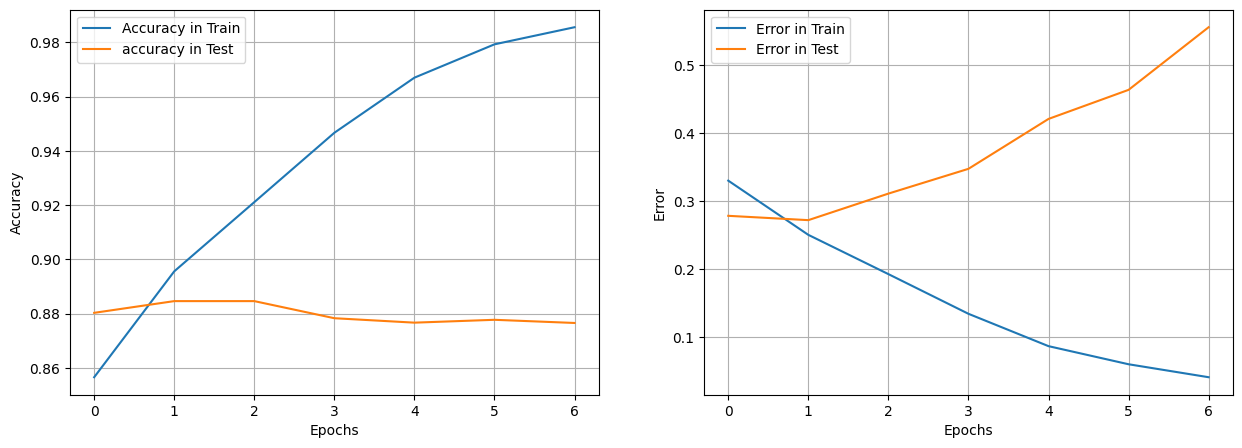

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','accuracy in Test'])
axes[0].grid(True)

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Error')
axes[1].legend(['Error in Train','Error in Test'])
axes[1].grid(True)

In [ ]:
test_texts = test_data['tweet_text']
test_texts

29832     death toll greek wildfire reach 91 village grief
39491    dorian democrat saw tweet decided benefit hono...
11072    revealed burning houston chemical plant succes...
13048    made one last stop tampa decentralized irma re...
13519    dear cnn name president gave salary amp donate...
                               ...                        
16481    hurricane irma wind leaving trail destruction ...
3944     ashiraim propey destroyed cycloneidai cyclonei...
48680    manushan ya 1 one first donate 2 donated 25 la...
7305     resident amp volunteer need shelter nrg stadiu...
13400    shocking picture emerged extensive damage irma...
Name: tweet_text, Length: 10707, dtype: object

In [ ]:
test_input_ids, test_attention_masks = encode_bert(test_texts,max_length)
print(test_input_ids,'  ',test_attention_masks)

[[  101  2331  9565 ...     0     0     0]
 [  101 16092  7672 ...     0     0     0]
 [  101  3936  5255 ...     0     0     0]
 ...
 [  101  2158 20668 ...     0     0     0]
 [  101  6319 23713 ...     0     0     0]
 [  101 16880  3861 ...     0     0     0]]    [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
predictions = model.predict([test_input_ids, test_attention_masks])

335/335 [==============================] - 41s 113ms/step


In [ ]:
predictions[1]

array([0.99992657], dtype=float32)

In [ ]:
BERTpredictions = [0 if x < .5 else 1 for x in predictions]

In [ ]:
# print(predictions)
# test_predictions = np.argmax(predictions, axis=1)
# test_predictions

In [ ]:
test_data['aggregated_label']

29832    0
39491    1
11072    1
13048    1
13519    1
        ..
16481    0
3944     0
48680    1
7305     1
13400    0
Name: aggregated_label, Length: 10707, dtype: int64

In [ ]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(test_data['aggregated_label'], BERTpredictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      3881
           1       0.90      0.92      0.91      6826

    accuracy                           0.88     10707
   macro avg       0.87      0.87      0.87     10707
weighted avg       0.88      0.88      0.88     10707



### Load models

In [ ]:
from tensorflow.keras.models import load_model
fastTextLSTModel = load_model('/content/fastText_lstm_model.h5')
gLoveLSTModel = load_model('/content/lstm_gLoveModel.h5')

In [ ]:
/content/drive/MyDrive/model_bertV1.h5

#### Tokenize the data

In [ ]:
!pip install tokenizers

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenize the text using a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['tweet_text'])

In [ ]:
# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_data['tweet_text'])
test_sequences = tokenizer.texts_to_sequences(test_data['tweet_text'])

# Pad sequences to a fixed length
max_length = 60
train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Create word embedding matrices
word_index = tokenizer.word_index
num_words = len(word_index) + 1

In [ ]:
# Pad sequences
max_len = 60
X_train = pad_sequences(train_sequences, maxlen=max_len, padding='post')
X_test = pad_sequences(test_sequences, maxlen=max_len, padding='post')

In [ ]:
X_test.shape

(10707, 60)

In [ ]:
test_data['aggregated_label']

29832    0
39491    1
11072    1
13048    1
13519    1
        ..
16481    0
3944     0
48680    1
7305     1
13400    0
Name: aggregated_label, Length: 10707, dtype: int64

## Ensemble Learning

In [ ]:
# FastText
fastTextpredictions = fastTextLSTModel.predict(X_test)

335/335 [==============================] - 2s 4ms/step


In [ ]:
# GLove
Glovepredictions = gLoveLSTModel.predict(X_test)

335/335 [==============================] - 2s 5ms/step


In [ ]:
# BERT predictions
predictions

array([[3.9357296e-04],
       [9.9986172e-01],
       [9.9755520e-01],
       ...,
       [9.9990010e-01],
       [9.9925357e-01],
       [6.3528866e-02]], dtype=float32)

In [ ]:
import numpy as np

# Three example arrays
array1 = np.array(fastTextpredictions)
array2 = np.array(Glovepredictions)
array3 = np.array(predictions)

# Calculate the mean of the three arrays
ensemble_mean = np.mean([array1, array2, array3], axis=0)

print(ensemble_mean)


[[0.01146688]
 [0.98444635]
 [0.89449424]
 ...
 [0.997663  ]
 [0.9786625 ]
 [0.03851571]]


In [ ]:
ensemble_mean = [0 if x < .5 else 1 for x in ensemble_mean]

In [ ]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(test_data['aggregated_label'], ensemble_mean))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      3881
           1       0.90      0.93      0.92      6826

    accuracy                           0.89     10707
   macro avg       0.89      0.88      0.88     10707
weighted avg       0.89      0.89      0.89     10707



## BERT with LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def create_model(bert_model):

    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids, attention_masks])
    output = output[1]

    # Reshape output to (batch_size, 1, output_dim)
    output = tf.keras.layers.Reshape((1, -1))(output)

    output = tf.keras.layers.LSTM(32)(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(6, activation='softmax')(output)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    model.compile(Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model(model_bert)

In [ ]:
stoped = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
redutor = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
history = model.fit([train_input_ids_bert, train_attention_masks_bert],
    target, validation_split=0.2, epochs=6, batch_size=16, callbacks=[stoped, redutor])

Epoch 1/6
2142/2142 [==============================] - 413s 170ms/step - loss: 0.8393 - accuracy: 0.7282 - val_loss: 0.5973 - val_accuracy: 0.8007 - lr: 1.0000e-05
Epoch 2/6
2142/2142 [==============================] - 353s 165ms/step - loss: 0.5806 - accuracy: 0.8090 - val_loss: 0.5664 - val_accuracy: 0.8025 - lr: 1.0000e-05
Epoch 3/6
2142/2142 [==============================] - 353s 165ms/step - loss: 0.4753 - accuracy: 0.8481 - val_loss: 0.5822 - val_accuracy: 0.8015 - lr: 1.0000e-05
Epoch 4/6
2142/2142 [==============================] - 352s 164ms/step - loss: 0.3732 - accuracy: 0.8866 - val_loss: 0.6323 - val_accuracy: 0.7894 - lr: 1.0000e-05
Epoch 5/6
2142/2142 [==============================] - 351s 164ms/step - loss: 0.2820 - accuracy: 0.9218 - val_loss: 0.6746 - val_accuracy: 0.7900 - lr: 1.0000e-05
Epoch 6/6
2142/2142 [==============================] - 342s 160ms/step - loss: 0.2150 - accuracy: 0.9449 - val_loss: 0.7335 - val_accuracy: 0.7861 - lr: 1.0000e-05


In [ ]:
import os

# Define the output directory path
output_dir = '/kaggle/working/output'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the model to the output directory
model.save(os.path.join(output_dir, 'model_bert_lstm.h5'))


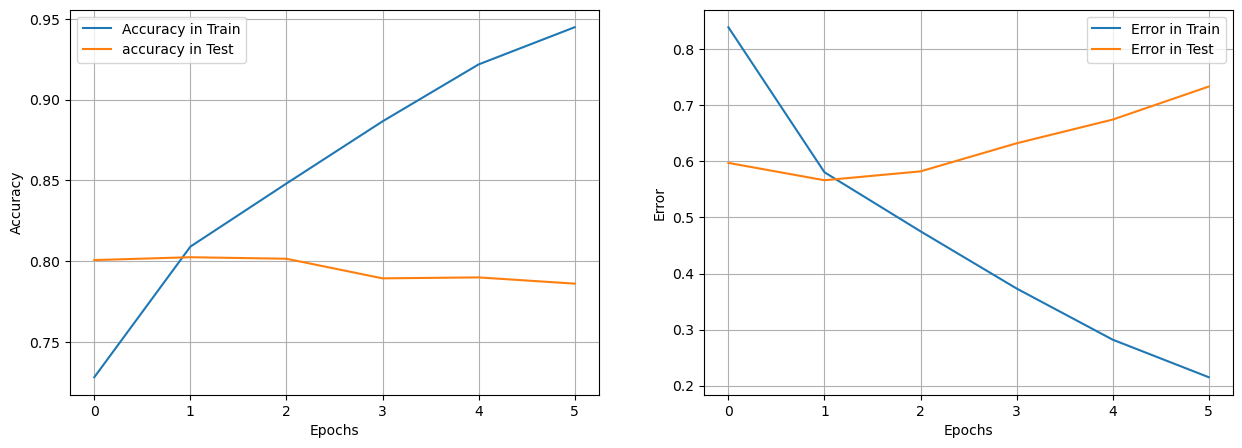

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','accuracy in Test'])
axes[0].grid(True)

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Error')
axes[1].legend(['Error in Train','Error in Test'])
axes[1].grid(True)

In [ ]:
test_texts = test_data['tweet_text']
test_texts

29832    Death toll from Greek wildfire reaches 91 as v...
39491    Dorian is a Democrat He saw this tweet and dec...
11072    REVEALED Burning Houston chemical plant succes...
13048    Made one last stop to the Tampa Decentralized ...
13519    Dear CNN Name The President Who Gave Up His Sa...
                               ...                        
16481    Hurricane Irma Winds Down Leaving a Trail of D...
3944     RT AshiraiM Propey all destroyed cycloneidai c...
48680    Manushan ya 1 He was one of the First to donat...
7305     Residents amp volunteers who need shelter NRG ...
13400    Shocking pictures have emerged of the extensiv...
Name: tweet_text, Length: 10707, dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_input_ids, test_attention_masks = encode_bert(test_texts,max_length)
print(test_input_ids,'  ',test_attention_masks)

[[  101  2331  9565 ...     0     0     0]
 [  101 16092  2003 ...     0     0     0]
 [  101  3936  5255 ...     0     0     0]
 ...
 [  101  2158 20668 ...     0     0     0]
 [  101  3901 23713 ...     0     0     0]
 [  101 16880  4620 ...     0     0     0]]    [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
predictions = model.predict([test_input_ids, test_attention_masks])

335/335 [==============================] - 50s 148ms/step


In [ ]:
predictions[1]

array([0.9998617], dtype=float32)

In [ ]:
# print(predictions)
test_predictions = np.argmax(predictions, axis=1)
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_data['aggregated_label']

29832    0
39491    1
11072    1
13048    1
13519    1
        ..
16481    0
3944     0
48680    1
7305     1
13400    0
Name: aggregated_label, Length: 10707, dtype: int64

In [ ]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(test_data['aggregated_label'], test_predictions))

              precision    recall  f1-score   support

           0       0.36      1.00      0.53      3881
           1       0.00      0.00      0.00      6826

    accuracy                           0.36     10707
   macro avg       0.18      0.50      0.27     10707
weighted avg       0.13      0.36      0.19     10707



## BERT with CNN**

In [ ]:
def create_model(bert_model):
    input_ids = tf.keras.Input(shape=(60,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,), dtype='int32')

    output = bert_model([input_ids, attention_masks])
    output = output[1]

    # Reshape output to (batch_size, timesteps=1, features)
    output = tf.expand_dims(output, axis=1)

    output = tf.keras.layers.Conv1D(64, 3,activation='relu')(output)
    output = tf.keras.layers.GlobalMaxPooling1D()(output)
    output = tf.keras.layers.Dense(6, activation='softmax')(output)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    model.compile(Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
model = create_model(model_bert)


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_7. Consider increasing the input size. Received input shape [None, 1, 768] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
stoped = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
redutor = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
history = model.fit([train_input_ids_bert, train_attention_masks_bert],
    target, validation_split=0.2, epochs=10, batch_size=16, callbacks=[stoped, redutor])

In [ ]:
import os

# Define the output directory path
output_dir = '/kaggle/working/output'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the model to the output directory
model.save(os.path.join(output_dir, 'model_bert_cnn.h5'))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','accuracy in Test'])
axes[0].grid(True)

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Error')
axes[1].legend(['Error in Train','Error in Test'])
axes[1].grid(True)

In [ ]:
test_texts = test_data['tweet_text']
test_texts

In [ ]:
test_input_ids, test_attention_masks = encode_bert(test_texts,max_length)
print(test_input_ids,'  ',test_attention_masks)

In [ ]:
predictions = model.predict([test_input_ids, test_attention_masks])

In [ ]:
predictions[1]

In [ ]:
# print(predictions)
test_predictions = np.argmax(predictions, axis=1)
test_predictions

In [ ]:
test_data['aggregated_label']

In [ ]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(test_data['aggregated_label'], test_predictions))

## RoBERTa

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def create_model(model_roberta):

    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = model_roberta([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(64,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(6,activation='softmax')(output)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(learning_rate=1e-5),  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model(model_roberta)

In [ ]:
stoped = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
redutor = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
history = model.fit([train_input_ids_roberta, train_input_ids_roberta],
    target, validation_split=0.2, epochs=10, batch_size=16, callbacks=[stoped, redutor])

Epoch 1/10
2142/2142 [==============================] - 422s 176ms/step - loss: 1.6899 - accuracy: 0.2712 - val_loss: 1.6639 - val_accuracy: 0.3164 - lr: 1.0000e-05
Epoch 2/10
2142/2142 [==============================] - 354s 165ms/step - loss: 1.6497 - accuracy: 0.3232 - val_loss: 1.6130 - val_accuracy: 0.3363 - lr: 1.0000e-05
Epoch 3/10
1366/2142 [==================>...........] - ETA: 1:52 - loss: 1.6252 - accuracy: 0.3401

KeyboardInterrupt: 

In [ ]:
import os

# Define the output directory path
output_dir = '/kaggle/working/output'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the model to the output directory
model.save(os.path.join(output_dir, 'model_roberta.h5'))


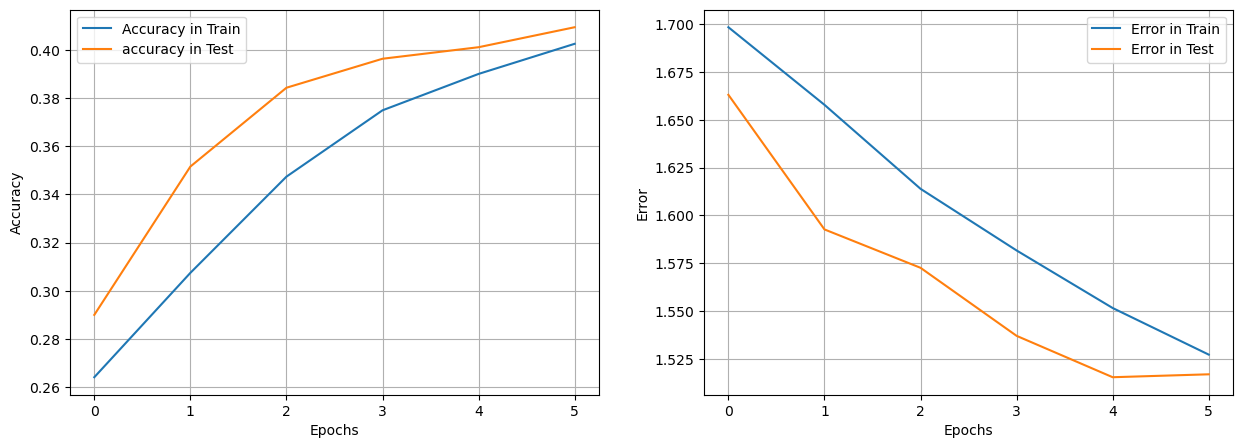

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','accuracy in Test'])
axes[0].grid(True)

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Error')
axes[1].legend(['Error in Train','Error in Test'])
axes[1].grid(True)

In [ ]:
test_texts = test_data['tweet_text']
test_texts

29832    Death toll from Greek wildfire reaches 91 as v...
39491    Dorian is a Democrat He saw this tweet and dec...
11072    REVEALED Burning Houston chemical plant succes...
13048    Made one last stop to the Tampa Decentralized ...
13519    Dear CNN Name The President Who Gave Up His Sa...
                               ...                        
16481    Hurricane Irma Winds Down Leaving a Trail of D...
3944     RT AshiraiM Propey all destroyed cycloneidai c...
48680    Manushan ya 1 He was one of the First to donat...
7305     Residents amp volunteers who need shelter NRG ...
13400    Shocking pictures have emerged of the extensiv...
Name: tweet_text, Length: 10707, dtype: object

In [ ]:
test_input_ids, test_attention_masks = encode_bert(test_texts,max_length)
print(test_input_ids,'  ',test_attention_masks)

[[  101  2331  9565 ...     0     0     0]
 [  101 16092  2003 ...     0     0     0]
 [  101  3936  5255 ...     0     0     0]
 ...
 [  101  2158 20668 ...     0     0     0]
 [  101  3901 23713 ...     0     0     0]
 [  101 16880  4620 ...     0     0     0]]    [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
predictions = model.predict([test_input_ids, test_attention_masks])

335/335 [==============================] - 32s 88ms/step


In [ ]:
test_predictions = np.argmax(predictions, axis=1)
test_predictions

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
test_data['aggregated_label']

29832    1
39491    2
11072    3
13048    3
13519    5
        ..
16481    3
3944     3
48680    5
7305     5
13400    3
Name: aggregated_label, Length: 10707, dtype: int64

In [ ]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(test_data['aggregated_label'], test_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       734
           1       0.00      0.00      0.00      2031
           2       0.00      0.00      0.00       877
           3       0.27      0.73      0.39      2798
           4       0.00      0.00      0.00      1224
           5       0.34      0.35      0.34      3043

    accuracy                           0.29     10707
   macro avg       0.10      0.18      0.12     10707
weighted avg       0.17      0.29      0.20     10707



## Trial 1

In [ ]:
# Perform comparison of different word embeddings
for embedding_name, tokenizer, model in [('BERT', tokenizer_bert, model_bert),
                                         ('RoBERTa', tokenizer_roberta, model_roberta),
                                         ('XLNet', tokenizer_xlnet, model_xlnet)]:
    # Obtain the word embeddings for the current embedding
    train_embeddings = model([train_input_ids_bert, train_attention_masks_bert])[0]

    # Train the deep neural network on the word embeddings
    model = create_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_embeddings, train_data['target'], epochs=10, batch_size=16)

    # Tokenize the test data and obtain word embeddings
    test_encodings = tokenizer(list(test_data['tweet_text']), truncation=True, max_length= max_length, padding=True, return_tensors='tf')
    test_input_ids = test_encodings['input_ids']
    test_attention_masks = test_encodings['attention_mask']
    test_embeddings = model([test_input_ids, test_attention_masks])[0]

    # Predict on the test data using the trained model
    test_predictions = model.predict(test_embeddings)
    test_predictions = np.argmax(test_predictions, axis=1)

    # Calculate performance metrics for the current embedding
    performance_metrics[embedding_name] = classification_report(test_data['target'], test_predictions,  target_names=['emergency_response','relevant_information','volunteering_or_donation','caution_and_advice','sympathy_and_support','irrelevant'])


In [ ]:
# Print the performance metrics for each word embedding
for embedding_name, metrics in performance_metrics.items():
    print("Performance Metrics for", embedding_name)
    print(metrics)

In [ ]:
# import tensorflow as tf
# # Model creation
# def create_model_bert():
#     input_ids = tf.keras.Input(shape=(max_length,), dtype='int32')
#     attention_masks = tf.keras.Input(shape=(max_length,), dtype='int32')

#     bert_model = TFBertModel.from_pretrained('bert-base-uncased')
#     output = bert_model([input_ids,attention_masks])
#     output = output[1]
#     output = tf.keras.layers.Dense(32,activation='relu')(output)
#     output = Dense(6, activation='softmax')(output)
#     model = Model(inputs=[input_ids, attention_masks], outputs=output)
#     model.compile(Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# def create_model_gpt():
#     input_ids = tf.keras.Input(shape=(max_length,), dtype='int32')

#     gpt_model = TFGPT2Model.from_pretrained('gpt2')
#     output = gpt_model(input_ids)[0]
#     output = LSTM(32)(output[:, -1, :])
#     output = Dense(1, activation='sigmoid')(output)

#     model = Model(inputs=input_ids, outputs=output)
#     model.compile(Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#     return model


In [ ]:
# def create_model_roberta():
#     input_ids = tf.keras.Input(shape=(max_length,), dtype='int32')
#     attention_masks = tf.keras.Input(shape=(max_length,), dtype='int32')

#     roberta_model = TFRobertaModel.from_pretrained('roberta-base')
#     output = roberta_model([input_ids, attention_masks])
#     output = output[0]
#     output = tf.keras.layers.Dense(32, activation='relu')(output[:, 0, :])
#     output = tf.keras.layers.Dropout(0.2)(output)
#     output = tf.keras.layers.Dense(6, activation='softmax')(output)

#     model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
#     model.compile(Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# def create_model_xlnet():
#     input_ids = tf.keras.Input(shape=(max_length,), dtype='int32')
#     attention_masks = tf.keras.Input(shape=(max_length,), dtype='int32')

#     xlnet_model = TFXLNetModel.from_pretrained('xlnet-base-cased')
#     output = xlnet_model([input_ids, attention_masks])
#     output = output[0]
#     output = tf.keras.layers.Dense(32, activation='relu')(output[:, -1, :])
#     output = tf.keras.layers.Dropout(0.2)(output)
#     output = tf.keras.layers.Dense(6, activation='softmax')(output)

#     model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
#     model.compile(Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# Training
model_bert = create_model_bert()
# model_gpt = create_model_gpt()
model_roberta = create_model_roberta()
model_xlnet = create_model_xlnet()

In [ ]:
stopper = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
reducer = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
history_bert = model_bert.fit([train_input_ids_bert, train_attention_masks_bert], target, validation_split=0.2, epochs=6, batch_size=16, callbacks=[stopper, reducer])
# history_gpt = model_gpt.fit(train_input_ids_gpt, target, validation_split=0.2, epochs=6, batch_size=16, callbacks=[stopper, reducer])
history_roberta = model_roberta.fit([train_input_ids_roberta, train_attention_masks_roberta], target, validation_split=0.2, epochs=6, batch_size=16, callbacks=[stopper, reducer])
history_xlnet = model_xlnet.fit([train_input_ids_xlnet, train_attention_masks_xlnet], target, validation_split=0.2, epochs=6, batch_size=16, callbacks=[stopper, reducer])


## Evaluation & Comparision

In [ ]:
# Evaluation
def evaluate_model(model, input_ids, attention_masks, target):
    predictions = model.predict([input_ids, attention_masks])
    predictions = np.round(predictions).flatten()
    accuracy = accuracy_score(target, predictions)
    conf_matrix = confusion_matrix(target, predictions)
    report = classification_report(target, predictions, target_names=['emergency_response', 'relevant_information','volunteering_or_donation','caution_and_advice','sympathy_and_support','irrelevant'])

    return accuracy, conf_matrix, report

In [ ]:
accuracy_bert, conf_matrix_bert, report_bert = evaluate_model(model_bert, train_input_ids_bert, train_attention_masks_bert, target)
# accuracy_gpt, conf_matrix_gpt, report_gpt = evaluate_model(model_gpt, train_input_ids_gpt, None, target)
accuracy_roberta, conf_matrix_roberta, report_roberta = evaluate_model(model_roberta, train_input_ids_roberta, train_attention_masks_roberta, target)
accuracy_xlnet, conf_matrix_xlnet, report_xlnet = evaluate_model(model_xlnet, train_input_ids_xlnet, train_attention_masks_xlnet, target)


In [ ]:
print("BERT Accuracy: {:.4f}".format(accuracy_bert))
print("BERT Confusion Matrix:")
print(conf_matrix_bert)
print("BERT Classification Report:")
print(report_bert)

In [ ]:
# print("GPT Accuracy: {:.4f}".format(accuracy_gpt))
# print("GPT Confusion Matrix:")
# print(conf_matrix_gpt)
# print("GPT Classification Report:")
# print(report_gpt)

In [ ]:
print("RoBERTa Accuracy: {:.4f}".format(accuracy_roberta))
print("RoBERTa Confusion Matrix:")
print(conf_matrix_roberta)
print("RoBERTa Classification Report:")
print(report_roberta)

In [ ]:
print("XLNet Accuracy: {:.4f}".format(accuracy_xlnet))
print("XLNet Confusion Matrix:")
print(conf_matrix_xlnet)
print("XLNet Classification Report:")
print(report_xlnet)

In [ ]:
# Comparative Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.heatmap(conf_matrix_bert, annot=True, fmt='d', cmap='Blues', ax=axes[0][0])
axes[0][0].set_title('BERT Confusion Matrix')
axes[0][0].set_xlabel('Predicted Label')
axes[0][0].set_ylabel('True Label')

# sns.heatmap(conf_matrix_gpt, annot=True, fmt='d', cmap='Blues', ax=axes[0][1])
# axes[0][1].set_title('GPT Confusion Matrix')
# axes[0][1].set_xlabel('Predicted Label')
# axes[0][1].set_ylabel('True Label')

sns.heatmap(conf_matrix_roberta, annot=True, fmt='d', cmap='Blues', ax=axes[1][0])
axes[1][0].set_title('RoBERTa Confusion Matrix')
axes[1][0].set_xlabel('Predicted Label')
axes[1][0].set_ylabel('True Label')

sns.heatmap(conf_matrix_xlnet, annot=True, fmt='d', cmap='Blues', ax=axes[1][1])
axes[1][1].set_title('XLNet Confusion Matrix')
axes[1][1].set_xlabel('Predicted Label')
axes[1][1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [ ]:
import os

# Define the output directory path
output_dir = '/kaggle/working/output'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the model to the output directory
model_xlnet.save(os.path.join(output_dir, 'model_xlnet.h5'))
model_roberta.save(os.path.join(output_dir, 'model_roberta.h5'))
model_bert.save(os.path.join(output_dir, 'model_bert.h5'))
